In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\meb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }

最近一周温度预报温度性对比

In [3]:
dir_ob = "SURFACE\QC_BY_FSOL\TMP_ALL_STATION/YYYYMMDDHH0000.000"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station_alt = meb.read_station(meb.station_国家站)
station = station_alt.copy()
station["data0"] = meb.IV
id_dict = {"北京":54511,"哈尔滨":50953, "武汉":57494,"广州":59287}
id_list = []
for key in id_dict.keys():
    id_list.append(id_dict[key])
station_city = meb.in_id_list(station,id_list)
veri_day_count =7
time1 = today - datetime.timedelta(days = veri_day_count)
tweek_ago = time1 - datetime.timedelta(days = veri_day_count)

In [4]:
#读取观测数据
ob_list = []
time2 = time1
while time2 <= now:
    path = meb.tool.path_tools.get_path(dir_ob,time2)
    sta = mpd.application.read_stadata(para,path,station = station)
    meb.set_stadata_names(sta,["ob"])
    ob_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 3)
ob_all = pd.concat(ob_list,axis = 0)

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200320/20200320230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_ALL_STATION/20200321/20200321200000.000
O:/data/sta/SURFACE\QC_BY

In [5]:
#读取模式数据
dir_scmoc = r"NWFD_SCMOC\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
        meb.set_stadata_names(sta,["scmoc"])
        scmoc_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_all = pd.concat(scmoc_list,axis = 0)

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.003.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.006.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.012.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.015.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.018.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.021.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.024.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.039.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200320/20032008.042.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.072.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.075.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.078.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.081.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.084.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.087.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.090.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.093.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.096.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.099.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.102.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.105.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.108.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200321/20032108.111.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032208.141.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032208.144.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.003.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.006.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.012.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.015.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.018.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.021.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.024.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.027.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.030.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.033.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200322/20032220.036.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.066.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.069.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.072.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.075.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.078.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.081.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.084.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.087.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.090.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.093.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.096.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.099.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.102.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200323/20032320.105.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200324/20032420.135.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200324/20032420.138.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200324/20032420.141.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200324/20032420.144.nc
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.003
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.006
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.009
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.012
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.015
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.018
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.021
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.024
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.027
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.030
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.033
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.036
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.039
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.042
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.045
NWFD_SCMOC\TMP\2M_ABOVE_GROUND\20032508.048
NWFD_SCMOC\TMP\2M_AB

O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.114.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.117.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.120.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.123.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.126.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.129.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.132.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.135.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.138.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.141.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032608.144.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032620.003.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032620.006.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABOVE_GROUND/20200326/20032620.009.nc
O:/data/grid/NWFD_SCMOC\TMP\2M_ABO

In [6]:
#读取模式数据
dir_grapes = r"GRAPES_GFS\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_grapes,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta is not None:
            meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes_gfs"])
            grapes_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_all = pd.concat(grapes_list,axis = 0)

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.018.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.021.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.024.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.027.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.030.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.033.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.036.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.039.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200320/20032008.042.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.069.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.081.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.084.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.087.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.090.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.093.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.096.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.099.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.102.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.105.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200321/20032108.108.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032208.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032208.138.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032208.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032208.144.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.018.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.021.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.024.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.027.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200322/20032220.030.nc
O:/data/gr

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.057.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.060.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.063.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.066.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.069.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.081.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.084.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.087.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.090.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.093.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200323/20032320.096.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032420.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200324/20032420.126.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032420.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200324/20032420.132.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032420.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200324/20032420.138.nc
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032420.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200324/20032420.144.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20032508.003.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20032508.006.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20032508.009.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20032508.012.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20032508.015.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200325/20

O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.045.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.048.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.051.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.054.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.057.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.060.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.063.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.066.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.069.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.072.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.075.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.078.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.081.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABOVE_GROUND/20200326/20032608.084.nc
O:/data/grid/GRAPES_GFS\TMP\2M_ABO

unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.108
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.111
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.114
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.117
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.120
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.123
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.126
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.129
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.132
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.135
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.138
unpack requires a buffer of 28 bytes
GRAPES_GFS\TMP\2M_ABOVE_GROUND\20032708.141
unpack requires a buffer of 

In [7]:

#读取模式数据
dir_gmosrr = r"GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\YYMMDDHH.TTT"
gmosrr_list = []
time2 = time1 
while time2 <= now:
    for dh in range(3,145,3):
        path = meb.tool.path_tools.get_path(dir_gmosrr,time2,dh)
        sta = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta is not None:
            meb.set_stadata_coords(sta,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["gmosrr"])
            gmosrr_list.append(sta)
    time2 = time2 + datetime.timedelta(hours = 12)
gmosrr_all = pd.concat(gmosrr_list,axis = 0)


GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.003
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.006
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.009
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.012
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.015
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.018
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.021
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.024
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.027
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.030
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032008.033
unpack requires a buffer 

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032020.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032020.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032020.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032020.141
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032020.144
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.003
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.006
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.009
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.012
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.015
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032108.018
unpack requires a buffer 

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.141
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032120.144
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032208.003
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032208.006
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032208.009
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032208.012
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032208.015
unpack requires a buffer 

unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.141
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032220.144
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032308.003
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032308.006
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\2

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.135
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.138
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032320.141
unpack requires a buffer 

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.129
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.132
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032420.135
unpack requires a buffer 

unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.099
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.114
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.117
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.120
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.123
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032520.126
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\2

GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.084
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.087
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.090
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.093
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.096
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.099
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.102
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.105
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.108
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.111
unpack requires a buffer of 28 bytes
GMOSRR\ROLLING_UPDATE\TMP\2M_ABOVE_GROUND\20032620.114
unpack requires a buffer 

In [8]:
ob_all = meb.between_value_range(ob_all,-60,60)

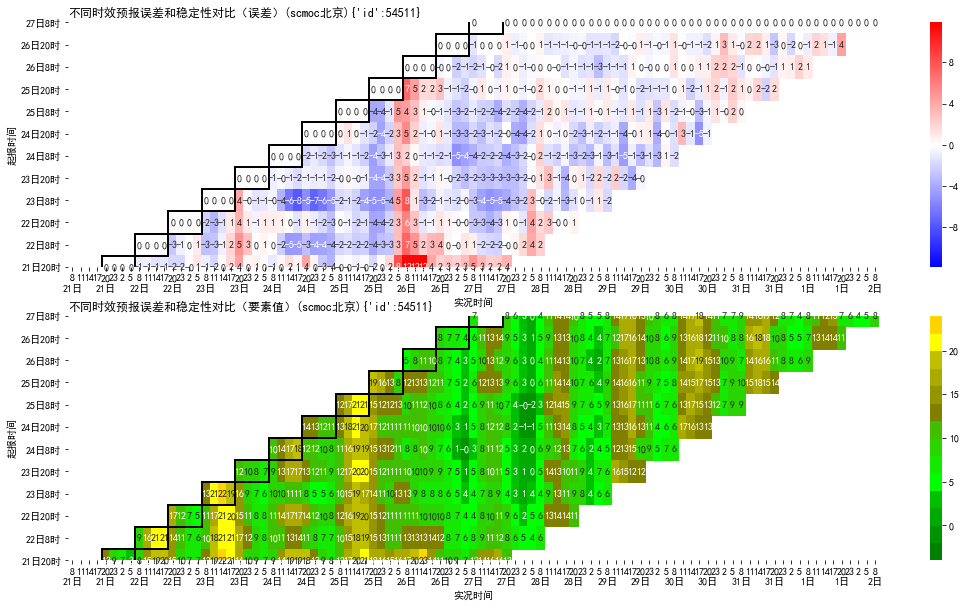

In [10]:
#开始检验
key ="北京"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
mpd.time_list_mesh_temp(sta_ob,sta_scmoc)

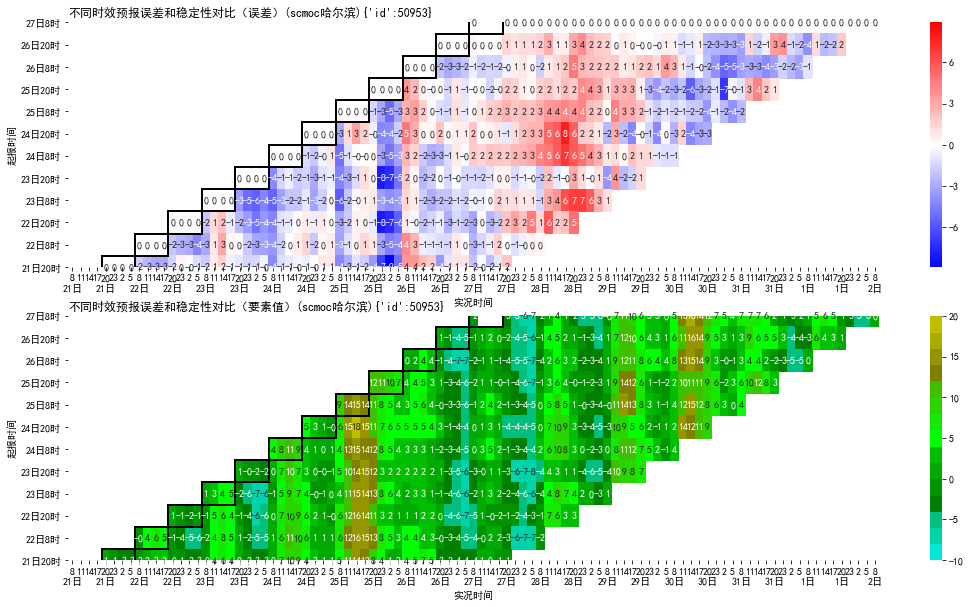

In [11]:
key ="哈尔滨"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
mpd.time_list_mesh_temp(sta_ob,sta_scmoc)

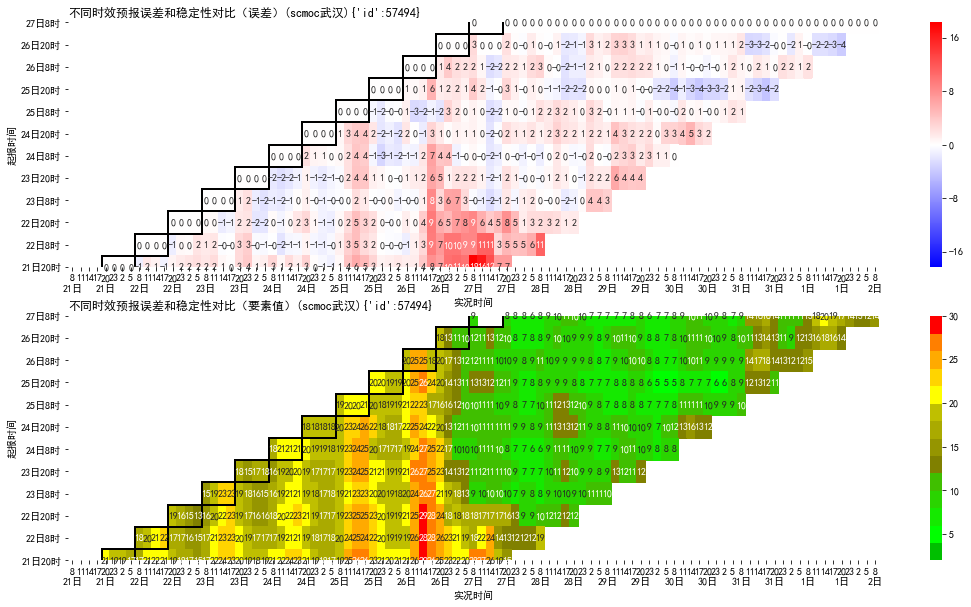

In [12]:
key ="武汉"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
mpd.time_list_mesh_temp(sta_ob,sta_scmoc)

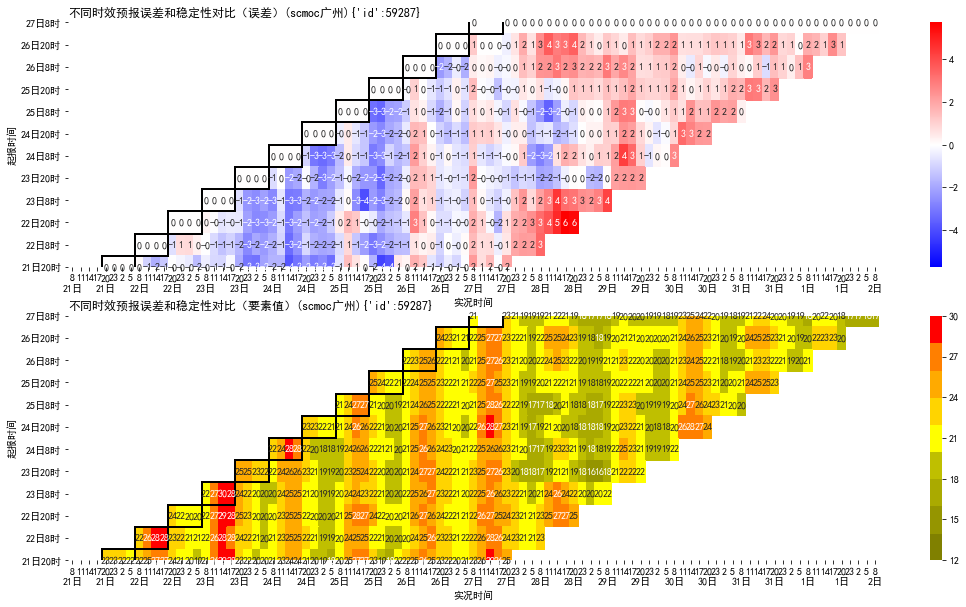

In [13]:
key ="广州"
sta_ob = meb.in_id_list(ob_all,[id_dict[key]])
sta_scmoc = meb.in_id_list(scmoc_all,[id_dict[key]])
meb.set_stadata_names(sta_scmoc,["scmoc"+key])
mpd.time_list_mesh_temp(sta_ob,sta_scmoc)

In [14]:
sta_all = meb.combine_on_obTime_id(ob_all,[scmoc_all,grapes_all])
sta_all = meb.not_IV(sta_all)

最大值位于
id:56385   lon:103.33  lat:29.52 value:10.343484


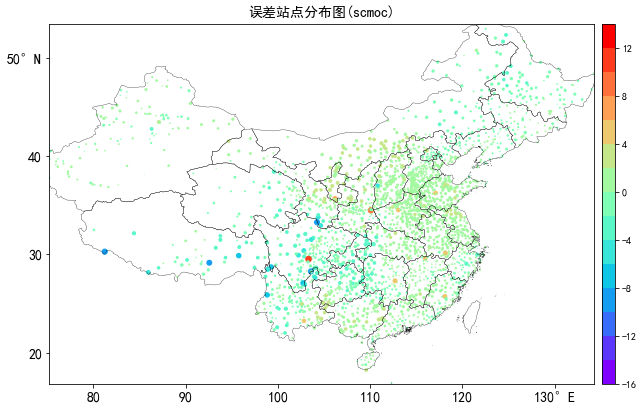

最大值位于
id:56263   lon:101.88  lat:30.88 value:15.20868


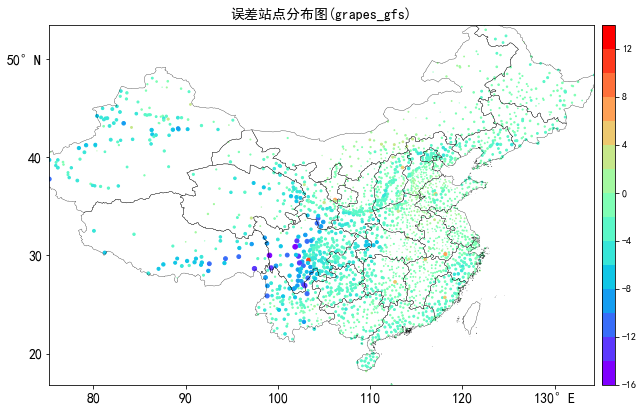

In [32]:
mpd.me_scatter(sta_all)

最大值位于
id:56385   lon:103.33  lat:29.52 value:10.564304


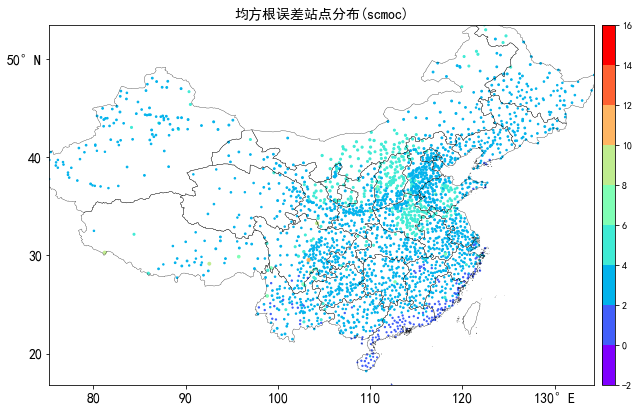

最大值位于
id:56263   lon:101.88  lat:30.88 value:15.545278


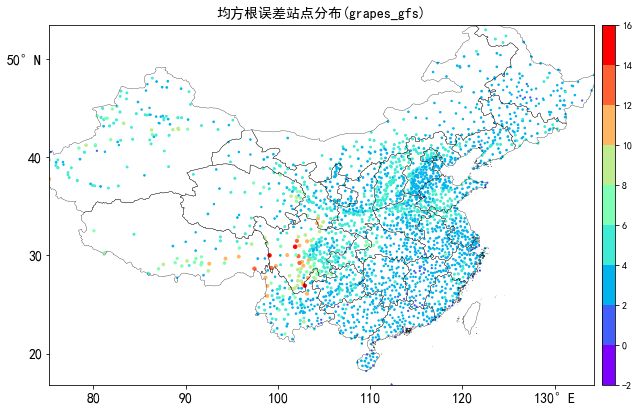

In [33]:
mpd.rmse_scatter(sta_all)

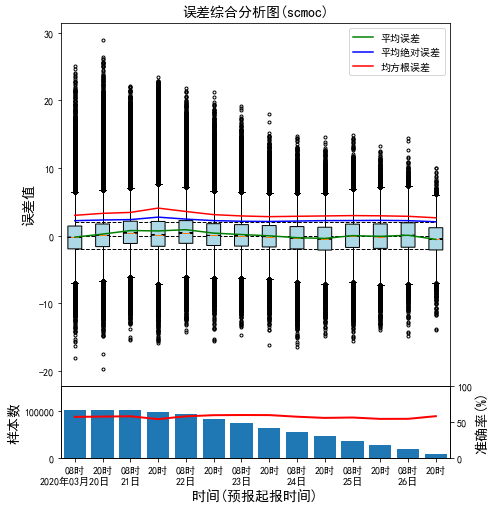

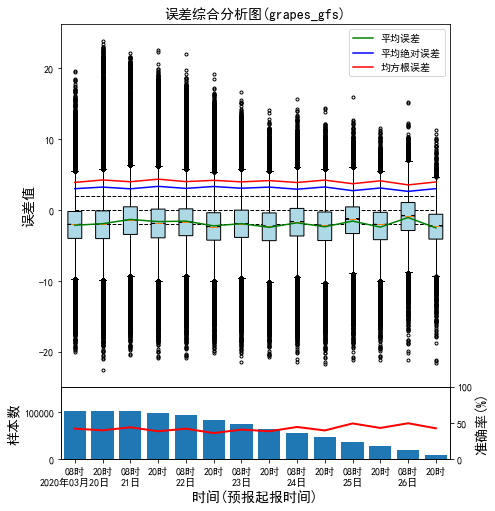

In [34]:
mpd.error_boxplot(sta_all,g = "time",threshold = 2)

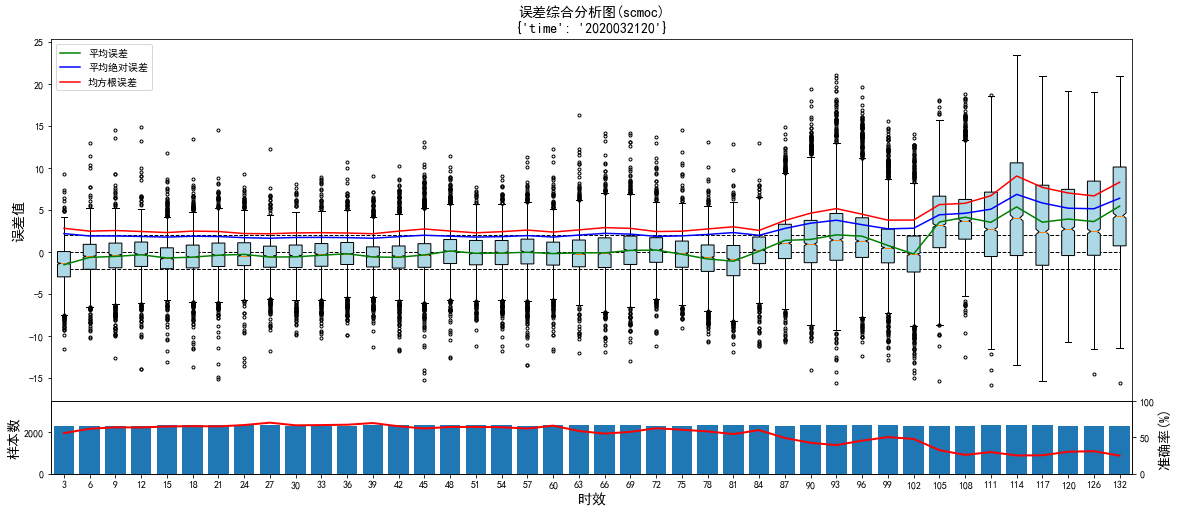

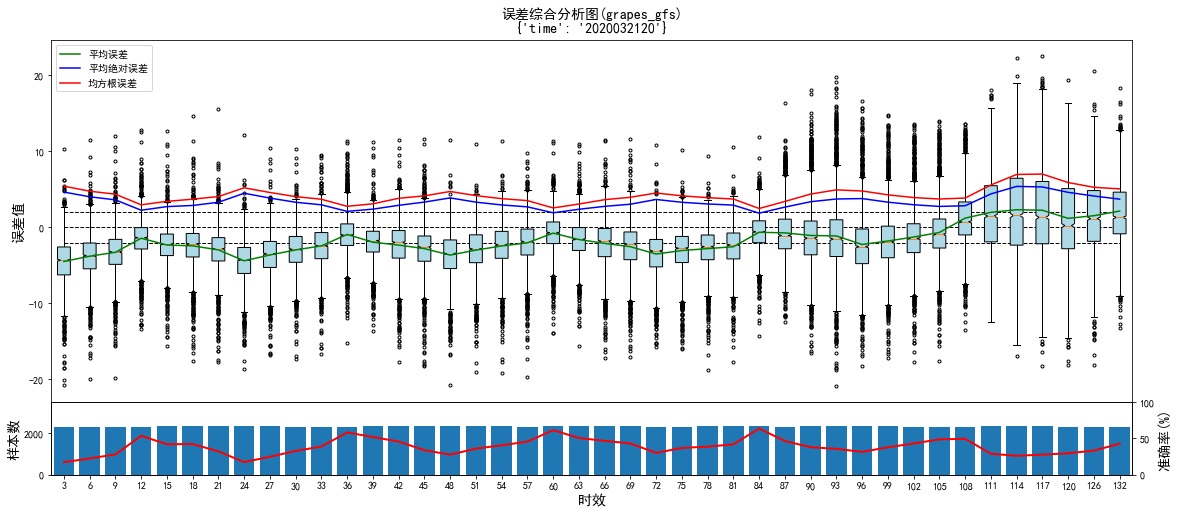

In [35]:
mpd.error_boxplot(sta_all,s = {"time":"2020032120"},g = "dtime")

最大值位于
id:56385   lon:103.33  lat:29.52 value:10.536757


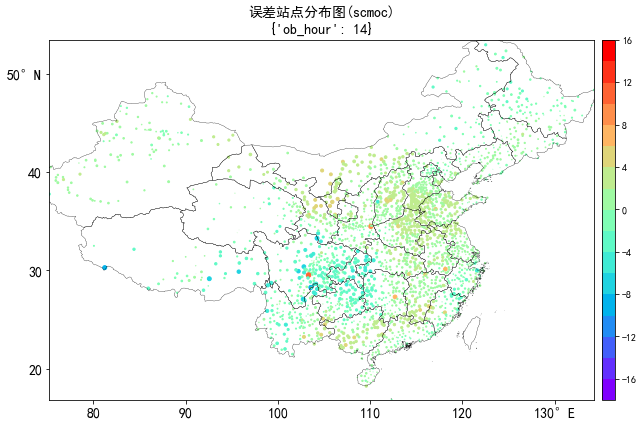

最大值位于
id:56263   lon:101.88  lat:30.88 value:16.665506


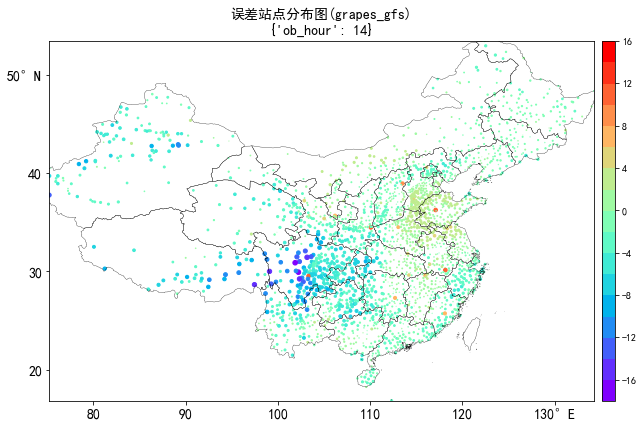

In [38]:
mpd.me_scatter(sta_all,s = {"ob_hour":14})

最大值位于
id:56385   lon:103.33  lat:29.52 value:9.874125


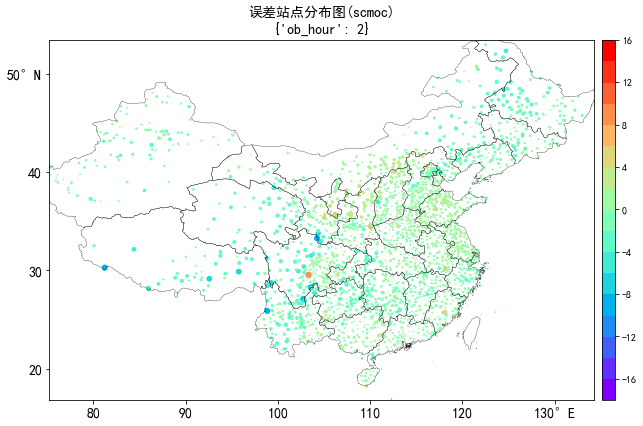

最大值位于
id:56673   lon:102.92  lat:26.92 value:17.36347


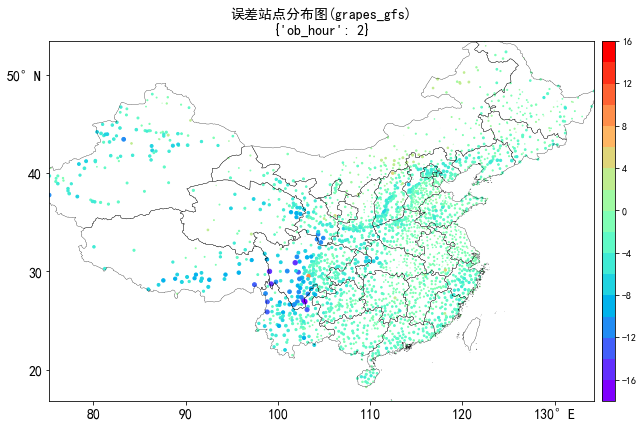

In [39]:
mpd.me_scatter(sta_all,s = {"ob_hour":2})

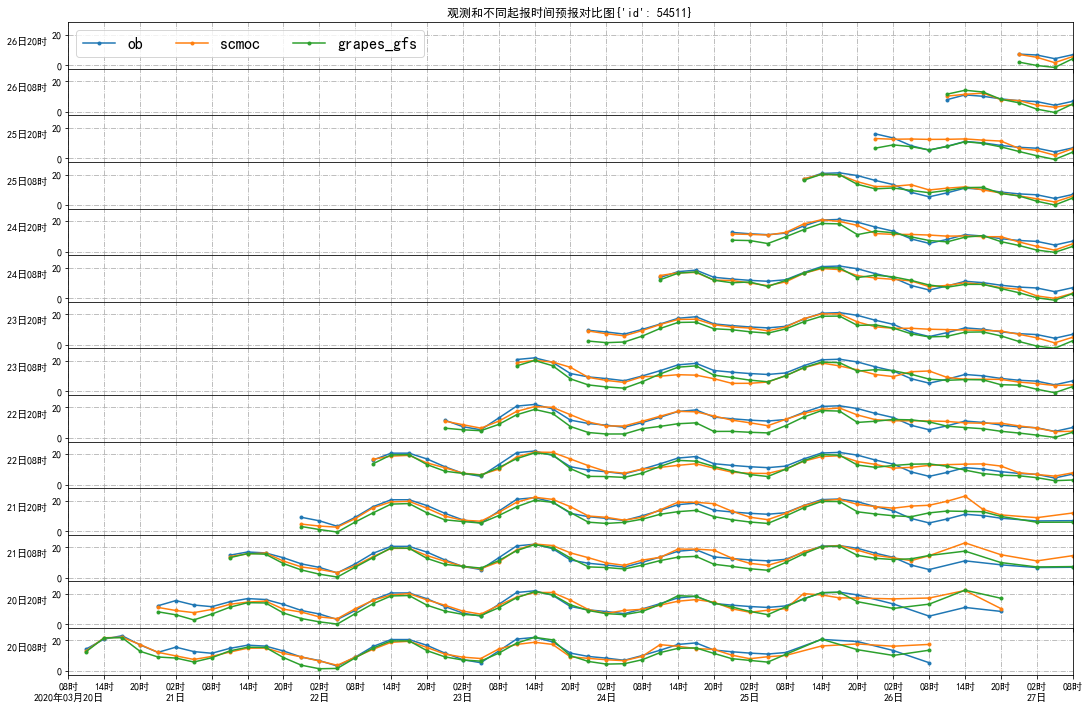

In [41]:
meb.set_stadata_names(sta_all,["ob","scmoc","grapes_gfs"])
sta1 = meb.in_id_list(sta_all,[id_dict["北京"]])
mpd.time_list_line(sta1)

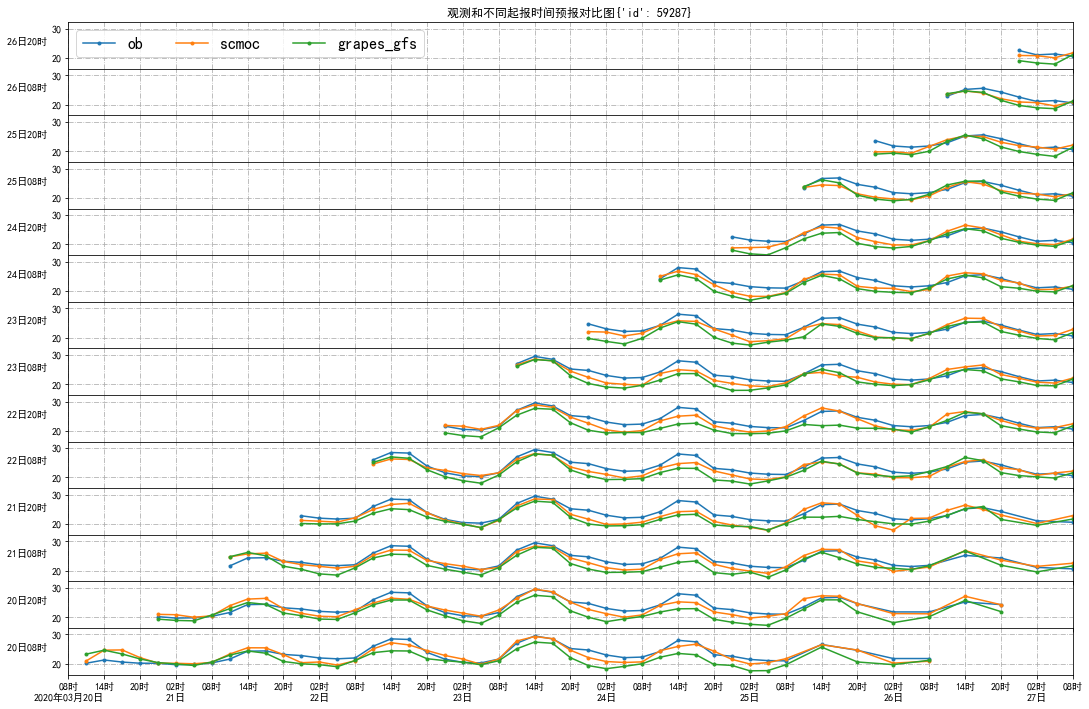

In [22]:
meb.set_stadata_names(sta_all,["ob","scmoc","grapes_gfs"])
sta1 = meb.in_id_list(sta_all,[id_dict["广州"]])
mpd.time_list_line(sta1)

In [23]:
station_alt = meb.read_stadata_from_micaps3(meb.station_国家站)
group_name_list=[]
id_list_list=[]
for i in range(10):
    salt = 500* i
    ealt = 500* (i+1)
    sta = meb.between_value_range(station_alt,salt,ealt)
    id_list_list.append(sta.loc[:,"id"].values.tolist())
    group_name_list.append(str(salt)+"-"+str(ealt))

In [24]:
result = mpd.score(sta_all,mem.rmse,g = "id",gll = id_list_list)

Text(0, 0.5, 'rmse')

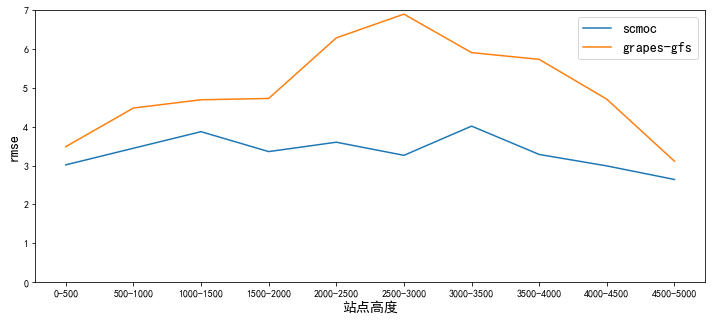

In [25]:
fig = plt.figure(figsize = (12,5))
x =np.arange(len(result[0]))
plt.plot(x,result[0][:,0],label = "scmoc")
plt.plot(x,result[0][:,1],label = "grapes-gfs")
plt.xticks(x,group_name_list)
plt.legend(fontsize = 14)
plt.ylim(0,7)
plt.xlabel("站点高度",fontsize = 14)
plt.ylabel("rmse",fontsize = 14)

No handles with labels found to put in legend.


Text(0, 0.5, '样本数')

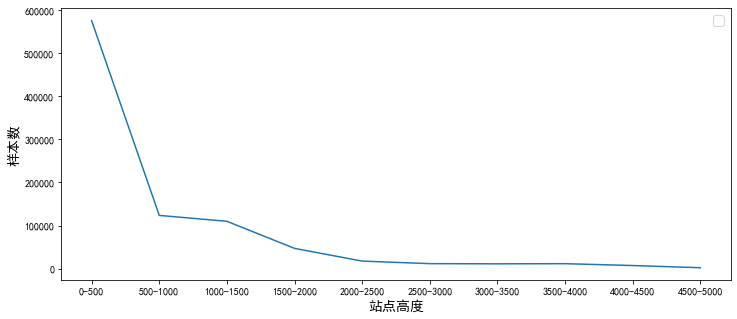

In [26]:
result = mpd.score(sta_all,mem.sample_count,g = "id",gll = id_list_list)
fig = plt.figure(figsize = (12,5))
x =np.arange(len(result[0]))
plt.plot(x,result[0][:,0])
plt.xticks(x,group_name_list)
plt.legend(fontsize = 14)
plt.xlabel("站点高度",fontsize = 14)
plt.ylabel("样本数",fontsize = 14)

In [27]:
#sta_all_24 = meb.combine_on_obTime_id(ob_all,[scmoc_all,gmosrr_all])
#sta_all_24 = meb.not_IV(sta_all_24)

In [28]:
#mpd.mae_scatter(sta_all_24)

In [29]:
#mpd.error_boxplot(sta_all_24,"time",threshold = 2)

最大值位于
id:56097   lon:104.25  lat:33.27 value:12.631902


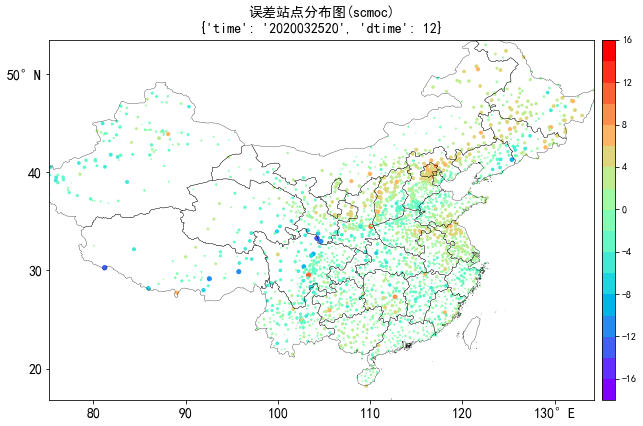

最大值位于
id:56097   lon:104.25  lat:33.27 value:16.3218


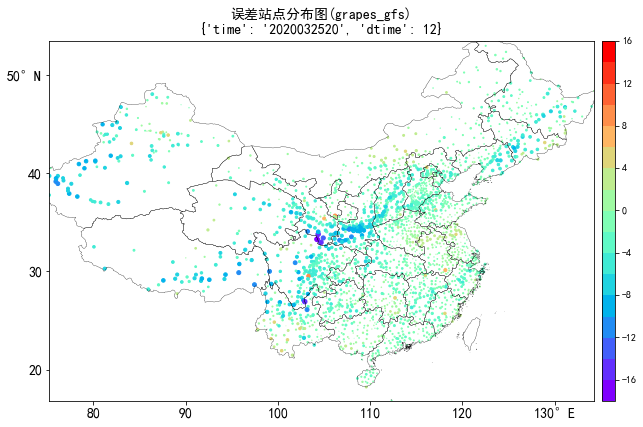

In [44]:
mpd.me_scatter(sta_all,s = {"time":"2020032520","dtime" :12})

In [ ]:
mpd.me_scatter(sta_all,s = {"time":"2020031908","dtime" :6,"lon":[108,120],"lat":[20,29]})

In [ ]:
meb.sele_by_dict(sta_all,s = {"id":id_dict["广州"],"time":"2020031820"})

最大值位于
id:56385   lon:103.33  lat:29.52 value:13.807105


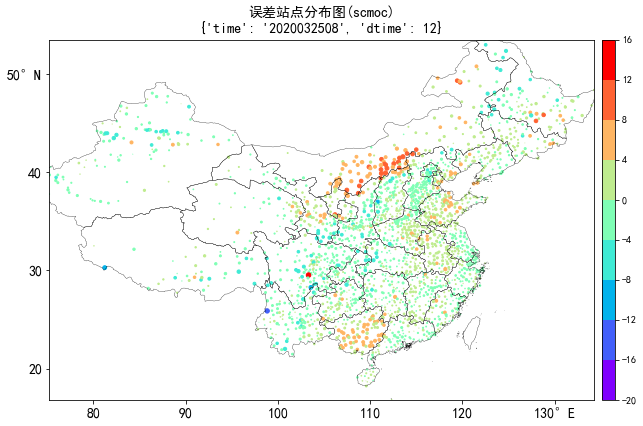

最大值位于
id:56263   lon:101.88  lat:30.88 value:19.424656


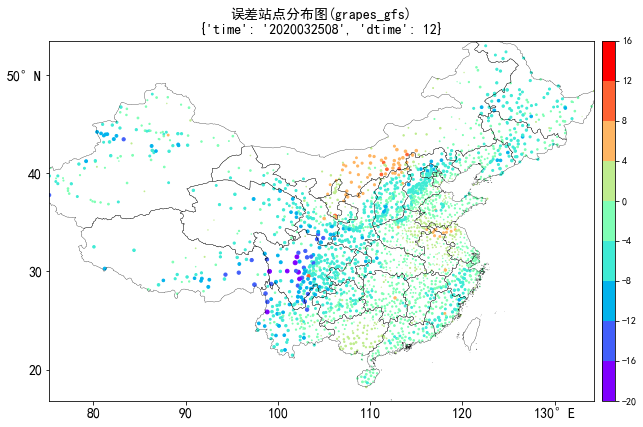

In [45]:
mpd.me_scatter(sta_all,s = {"time":"2020032508","dtime" :12})